| Roll Number | Name | Teacher Name | Subject Name | Assignment Number |
:-------------|:-----|:-------------|--------------|:------------------|
| MSDSF21M519 | Durrah Khan | Dr Muhammad Ali | Digital Image Processing | 3rd

# Digital Image Processing Assignment 3

## Problem-1:

Denoise the image (Img-1) using Butterworth Notch Reject filter of order 4. Show the noisy image, clean image, and the noise pattern (by taking IDFT of the filtered out frequencies) in juxtaposition. Note: Use appropriate values of cutoff frequencies taking guidance from the DFT spectrum of the image.

Importing libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### Notch Filter Function 

In [2]:
def notch_reject_filter(shape, d0=9 ,u_k=0, v_k=0):
    P, Q = shape
    # Initialize filter with zeros
    H = np.zeros((P, Q))

    # Traverse through filter
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 4)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 4)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H

#### Reading and Display Noise Image

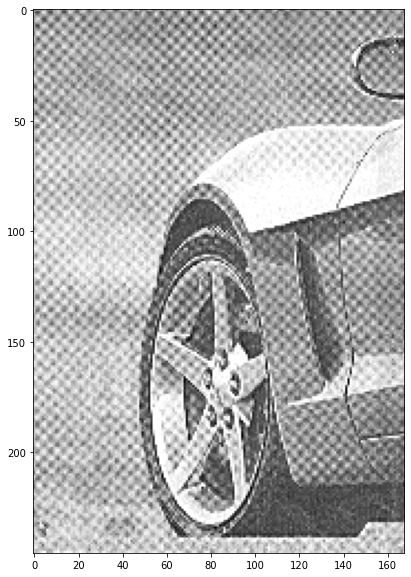

In [3]:
img = cv.imread('Img-1.tif',0)
plt.figure(figsize=(20,10))
plt.imshow(img,cmap='gray')

#### Calculating Magnitude Spectrum

In [4]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
phase_spectrumR = np.angle(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))

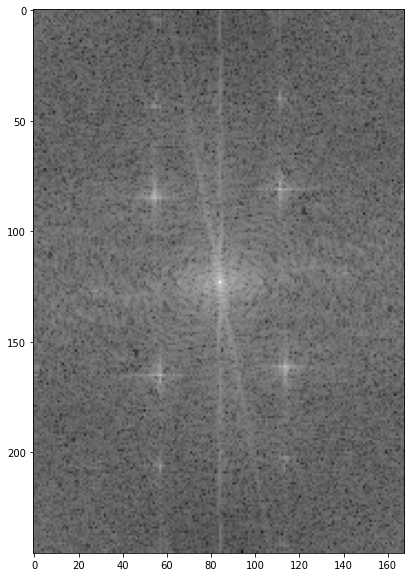

In [5]:
plt.figure(figsize=(20,10))
plt.imshow(magnitude_spectrum,cmap='gray')

#### Calculating Notch Filter

In [6]:
img_shape = img.shape

H1 = notch_reject_filter(img_shape, 4, 38, 30)
H2 = notch_reject_filter(img_shape, 4, -42, 27)
H3 = notch_reject_filter(img_shape, 2, 80, 30)
H4 = notch_reject_filter(img_shape, 2, -82, 28)

#### Apply Notch Filter and Taking Inverse

In [7]:
NotchFilter = H1*H2*H3*H4
NotchRejectCenter = fshift * NotchFilter 
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)  # Compute the inverse DFT of the result

In [8]:
Result = np.abs(inverse_NotchReject)

#### Display Result

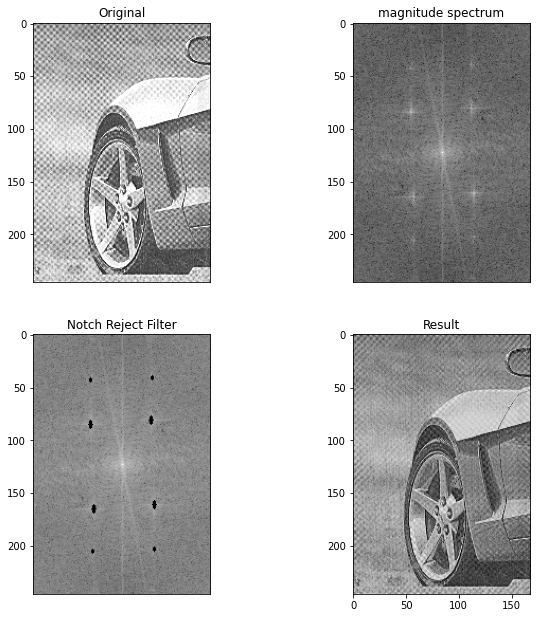

In [9]:
fig = plt.figure()
fig.set_size_inches(10.5, 10.5)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

#display image to each axes
ax1.imshow(img, cmap='gray')
ax2.imshow(magnitude_spectrum,cmap='gray')
ax3.imshow(magnitude_spectrum*NotchFilter,cmap='gray')
ax4.imshow(Result,cmap='gray')

#set text each subplot && remove x axes
ax1.title.set_text('Original')
ax1.get_xaxis().set_visible(False)
ax2.title.set_text('magnitude spectrum')
ax2.get_xaxis().set_visible(False)
ax3.title.set_text('Notch Reject Filter')
ax3.get_xaxis().set_visible(False)
ax4.title.set_text('Result')
ax3.get_xaxis().set_visible(False)

#save image to local drive
# plt.savefig('combined_result.jpg')

#display figure
plt.show()

## Problem 2:

Denoise the image (Img-2) using Butterworth Band Reject filter of order 4. Show the noisy image, clean image, and the noise pattern (by taking IDFT of the filtered out frequencies) in juxtaposition. Note: Use appropriate values of cutoff frequency and the band width taking guidance from the DFT spectrum of the image.

#### Reading and Display Noise Image

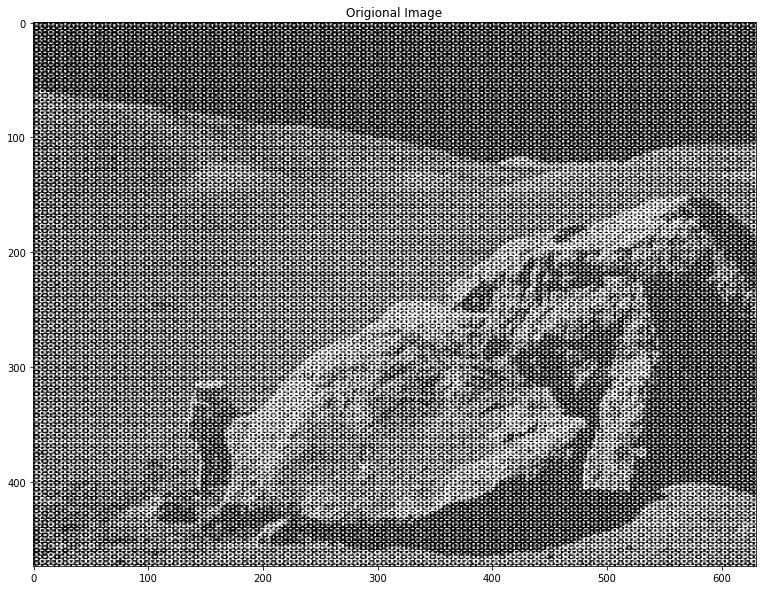

In [10]:
img = cv.imread('Img-2.tif',0)
plt.figure(figsize=(15,10))
plt.title("Origional Image")
plt.imshow(img, cmap='gray')

#### Calculating Magnitude Spectrum

In [11]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

#### Display Magnitude Spectrum

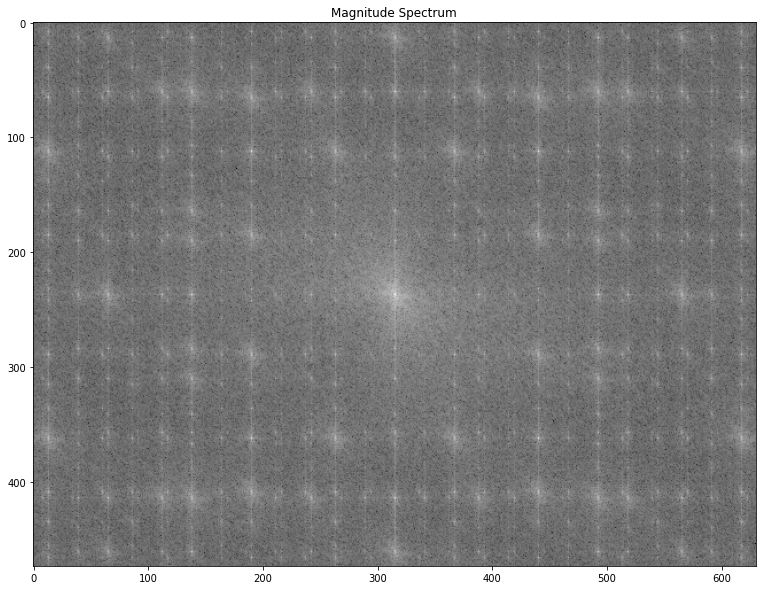

In [12]:
plt.figure(figsize=(15,10))
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

#### Band Reject FIlter Function

In [13]:
def band_reject_filter(shape, d0=9 ,u_k=0, v_k=0):
    P, Q = shape
    # Initialize filter with zeros
    H = np.zeros((P, Q))

    # Traverse through filter
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)
            H[u, v] = 1 / (1 + ((D_uv * D_muv) / (D_uv**2 - d0**2)) ** 4)
    
#             if D_uv < d0:
#                 H[u, v] = 1 / 1 + (D_uv / d0) **4
#             else:
#                 H[u, v] = 1.0

    return H

#### Calculating Band Reject Filter

In [14]:
img_shape = img.shape

H1 = band_reject_filter(img_shape, 4, 38, 30)
H2 = band_reject_filter(img_shape, 4, -42, 27)
H3 = band_reject_filter(img_shape, 2)
H4 = band_reject_filter(img_shape, 2, -82, 28)

/tmp/ipykernel_15094/3807452672.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  H[u, v] = 1 / (1 + ((D_uv * D_muv) / (D_uv**2 - d0**2)) ** 4)


#### Apply Band Reject Filter and Taking Inverse

In [15]:
BandRejectFilter = H4+H3+H2+H1
BandRejectCenter = fshift * BandRejectFilter 
BandReject = np.fft.ifftshift(BandRejectCenter)
inverse_BandReject = np.fft.ifft2(BandReject)

In [16]:
Result = np.abs(inverse_BandReject)

#### Display Result

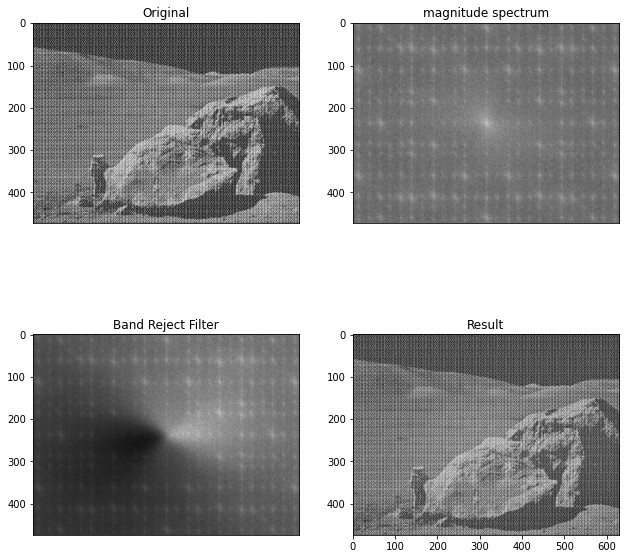

In [17]:
fig = plt.figure()
fig.set_size_inches(10.5, 10.5)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

#display image to each axes
ax1.imshow(img, cmap='gray')
ax2.imshow(magnitude_spectrum,cmap='gray')
ax3.imshow(magnitude_spectrum*BandRejectFilter,cmap='gray')
ax4.imshow(Result,cmap='gray')

#set text each subplot && remove x axes
ax1.title.set_text('Original')
ax1.get_xaxis().set_visible(False)
ax2.title.set_text('magnitude spectrum')
ax2.get_xaxis().set_visible(False)
ax3.title.set_text('Band Reject Filter')
ax3.get_xaxis().set_visible(False)
ax4.title.set_text('Result')
ax3.get_xaxis().set_visible(False)

#save image to local drive
# plt.savefig('combined_result.jpg')

#display figure
plt.show()